EDA

Preprocesamiento

Feature Selection

Modelos de Regresión

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("second_hand_cars.csv")

df.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


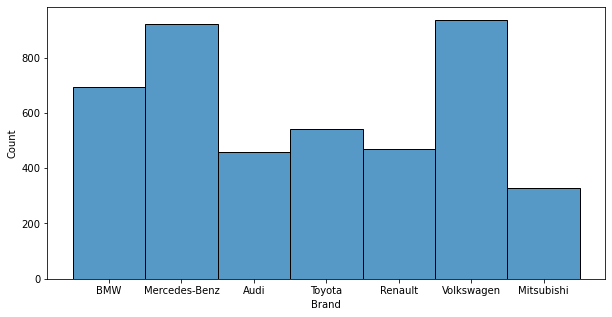

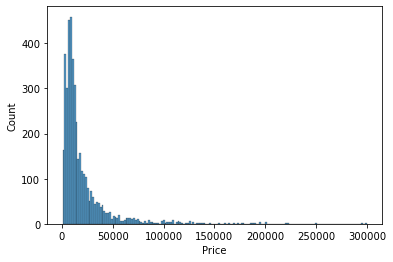

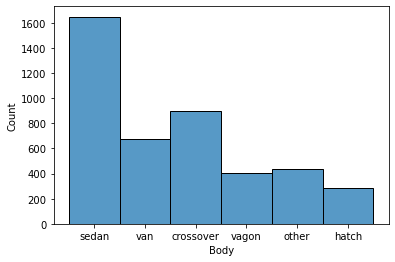

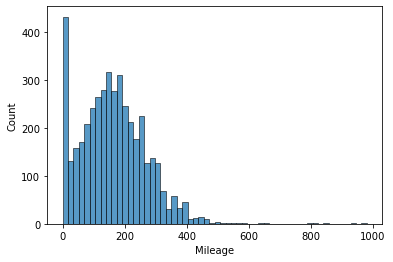

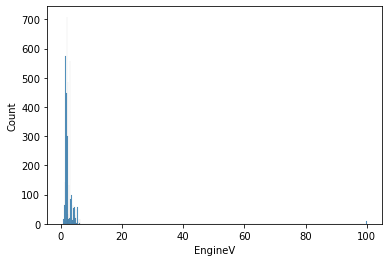

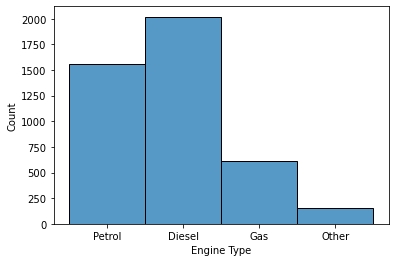

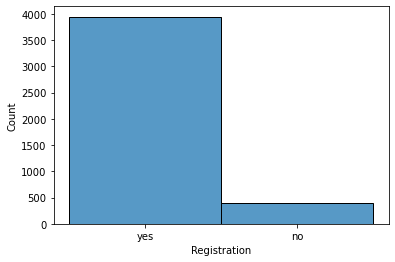

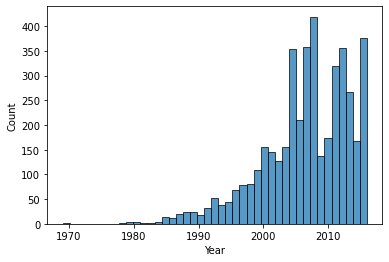

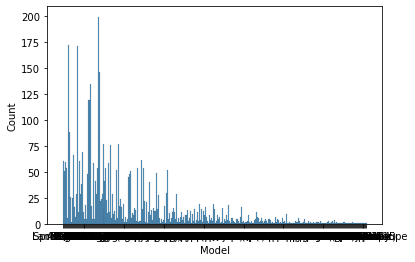

In [4]:
plt.figure(figsize = (10, 5))

for i in df.columns:
    sns.histplot(df[i])
    plt.show()


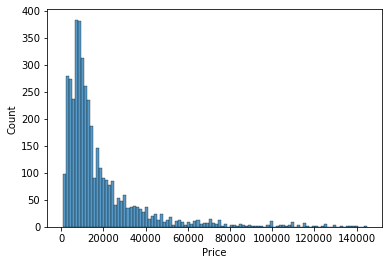

In [5]:
sns.histplot(df[df["Price"] < 150000]["Price"], bins = 100)
plt.show()

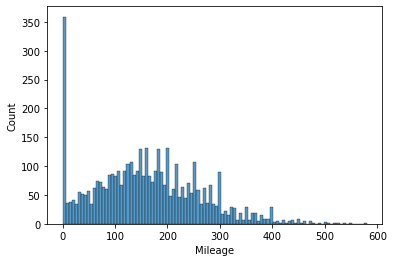

In [6]:
sns.histplot(df[df["Mileage"] < 600]["Mileage"], bins = 100)
plt.show()

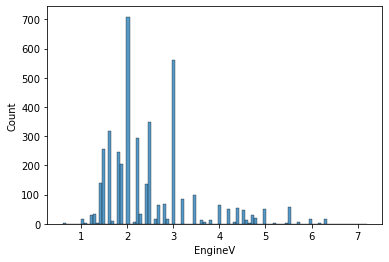

In [7]:
sns.histplot(df[df["EngineV"] < 7.5]["EngineV"], bins = 100)
plt.show()

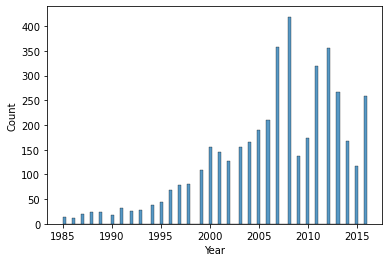

In [8]:
sns.histplot(df[df["Year"] >= 1985]["Year"], bins = 100)
plt.show()

In [9]:
# Preprocesamiento

In [10]:
#Dividimos las variables entre categóricas y numéricas
df_num = df._get_numeric_data().copy()
df_num.head(3)

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003


In [11]:
df_cat = df.drop(df_num.columns, axis = 1)
df_cat.head(3)

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500


In [12]:
df_cat["Brand"].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [13]:
df_cat["Body"].value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [14]:
df_cat["Engine Type"].value_counts()

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64

In [15]:
df_cat["Registration"].value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

In [16]:
df_cat["Model"].value_counts()

E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: Model, Length: 312, dtype: int64

In [17]:
# Convertimos las variables categóricas en numéricas

In [18]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Brand"], prefix = "Brand")], axis = 1)
df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,0,0
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,0,0,1,0,0,0,0
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,0,0
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,0,0
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,0,0
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,0,0
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,0,0
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,1,0


In [19]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Body"], prefix = "Body")], axis = 1)
df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,0,0,0,0,0,1,0,0
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,0,0,0,0,0,1,0,0
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,0,0,1,0,0,0,0,0
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,0,0,0,0,0,1,0,0
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,0,0,0,0,0,1,0,0
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,0,0,0,0,0,1,0,0
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,1,0,0,0,0,1,0,0


In [20]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Engine Type"], prefix = "Engine Type")], axis = 1)
df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Registration"], prefix = "Registration")], axis = 1)
df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
model_encoder = LabelEncoder()

model_encoder.fit(df["Model"])

model_encoder.transform(df["Model"])

array([ 18, 266, 237, ...,  31, 114, 284])

In [24]:
df_cat["Model_encoder"] = model_encoder.transform(df_cat["Model"])
df_cat.head(3)

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes,Model_encoder
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,18
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,266
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,237


In [25]:
# Revisar columnas numéricas

In [26]:
df_num

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007
4,18300.0,120,2.0,2011
...,...,...,...,...
4340,125000.0,9,3.0,2014
4341,6500.0,1,3.5,1999
4342,8000.0,194,2.0,1985
4343,14200.0,31,NaN,2014


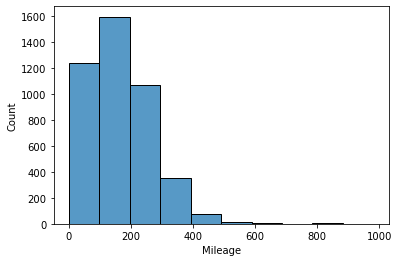

In [27]:
sns.histplot(df_num["Mileage"], bins = 10)

plt.show()

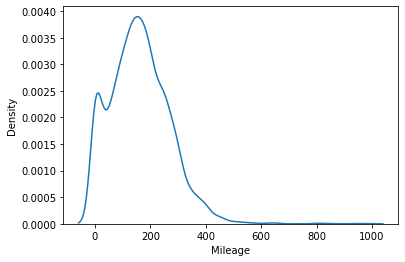

In [28]:
sns.kdeplot(df_num["Mileage"])

plt.show()

In [29]:
df_num[df_num["Mileage"] < 600]

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007
4,18300.0,120,2.0,2011
...,...,...,...,...
4340,125000.0,9,3.0,2014
4341,6500.0,1,3.5,1999
4342,8000.0,194,2.0,1985
4343,14200.0,31,NaN,2014


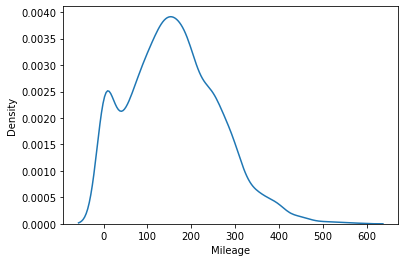

In [30]:
sns.kdeplot(df_num[df_num["Mileage"] < 600]["Mileage"])

plt.show()

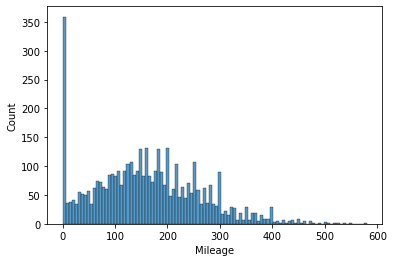

In [31]:
#Eliminamos outliers con Mileage > 600
df_num = df_num[df_num["Mileage"] < 600]

sns.histplot(df_num["Mileage"], bins = 100)

plt.show()

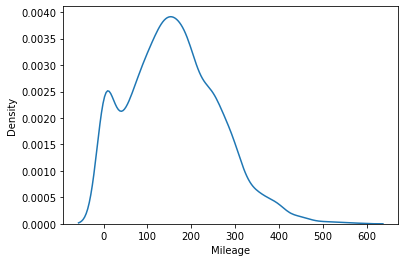

In [32]:
sns.kdeplot(df_num["Mileage"])
plt.show()

In [33]:
bins = np.linspace(min(df_num["Mileage"]), max(df_num["Mileage"]), 4)
bins

array([  0.        , 193.33333333, 386.66666667, 580.        ])

In [34]:
categorias = ["Pocos kms", "Uso normal", "Muchos kms"]
categorias

['Pocos kms', 'Uso normal', 'Muchos kms']

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_8608/3451901608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Mileage-Binning"] = pd.cut(df_num["Mileage"], bins, labels = categorias, include_lowest = True)


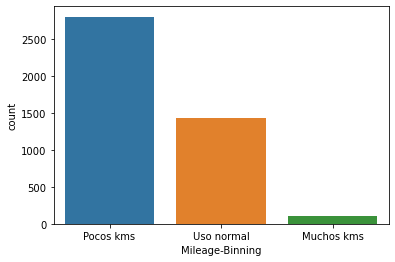

In [35]:
df_num["Mileage-Binning"] = pd.cut(df_num["Mileage"], bins, labels = categorias, include_lowest = True)

sns.countplot(x = df_num["Mileage-Binning"])

plt.show()

In [36]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


In [37]:
# Pasamos Mileage-Binning a LabelEncoder()
mileage_labelEncoding = LabelEncoder()

mileage_labelEncoding.fit(df_num["Mileage-Binning"].values)

# Transformamos la columna
mileage = mileage_labelEncoding.transform(df_num["Mileage-Binning"].values)

mileage

array([2, 0, 2, ..., 2, 1, 1])

In [38]:
df_num["Mileage-Binning"] = mileage

df_num["Mileage-Binning"].value_counts()
# 0 = Muchos kms, 1 = Pocos kms, 2 = Uso normal

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_8608/273084572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Mileage-Binning"] = mileage


1    2803
2    1434
0      99
Name: Mileage-Binning, dtype: int64

In [39]:
# Eliminar outliers
df_num = df_num[df_num["Price"] < 150000]
df_num = df_num[df_num["EngineV"] < 7.5]
df_num = df_num[df_num["Year"] >= 1985]

In [40]:
df_num.head()

,Price,Mileage,EngineV,Year,Mileage-Binning
0,4200.0,277,2.0,1991,2
1,7900.0,427,2.9,1999,0
2,13300.0,358,5.0,2003,2
3,23000.0,240,4.2,2007,2
4,18300.0,120,2.0,2011,1


In [41]:
df = pd.concat([df_num, df_cat], axis = 1)

df.head()

,Price,Mileage,EngineV,Year,Mileage-Binning,Brand,Body,Engine Type,Registration,Model,...,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes,Model_encoder
0,4200.0,277.0,2.0,1991.0,2.0,BMW,sedan,Petrol,yes,320,...,1,0,0,0,0,0,1,0,1,18
1,7900.0,427.0,2.9,1999.0,0.0,Mercedes-Benz,van,Diesel,yes,Sprinter 212,...,0,0,1,1,0,0,0,0,1,266
2,13300.0,358.0,5.0,2003.0,2.0,Mercedes-Benz,sedan,Gas,yes,S 500,...,1,0,0,0,1,0,0,0,1,237
3,23000.0,240.0,4.2,2007.0,2.0,Audi,crossover,Petrol,yes,Q7,...,0,0,0,0,0,0,1,0,1,224
4,18300.0,120.0,2.0,2011.0,1.0,Toyota,crossover,Petrol,yes,Rav 4,...,0,0,0,0,0,0,1,0,1,227


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 0 to 4344
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                3954 non-null   float64
 1   Mileage              3954 non-null   float64
 2   EngineV              3954 non-null   float64
 3   Year                 3954 non-null   float64
 4   Mileage-Binning      3954 non-null   float64
 5   Brand                4345 non-null   object 
 6   Body                 4345 non-null   object 
 7   Engine Type          4345 non-null   object 
 8   Registration         4345 non-null   object 
 9   Model                4345 non-null   object 
 10  Brand_Audi           4345 non-null   uint8  
 11  Brand_BMW            4345 non-null   uint8  
 12  Brand_Mercedes-Benz  4345 non-null   uint8  
 13  Brand_Mitsubishi     4345 non-null   uint8  
 14  Brand_Renault        4345 non-null   uint8  
 15  Brand_Toyota         4345 non-null   u

In [43]:
# EDA

In [44]:
df.head(3)

,Price,Mileage,EngineV,Year,Mileage-Binning,Brand,Body,Engine Type,Registration,Model,...,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes,Model_encoder
0,4200.0,277.0,2.0,1991.0,2.0,BMW,sedan,Petrol,yes,320,...,1,0,0,0,0,0,1,0,1,18
1,7900.0,427.0,2.9,1999.0,0.0,Mercedes-Benz,van,Diesel,yes,Sprinter 212,...,0,0,1,1,0,0,0,0,1,266
2,13300.0,358.0,5.0,2003.0,2.0,Mercedes-Benz,sedan,Gas,yes,S 500,...,1,0,0,0,1,0,0,0,1,237


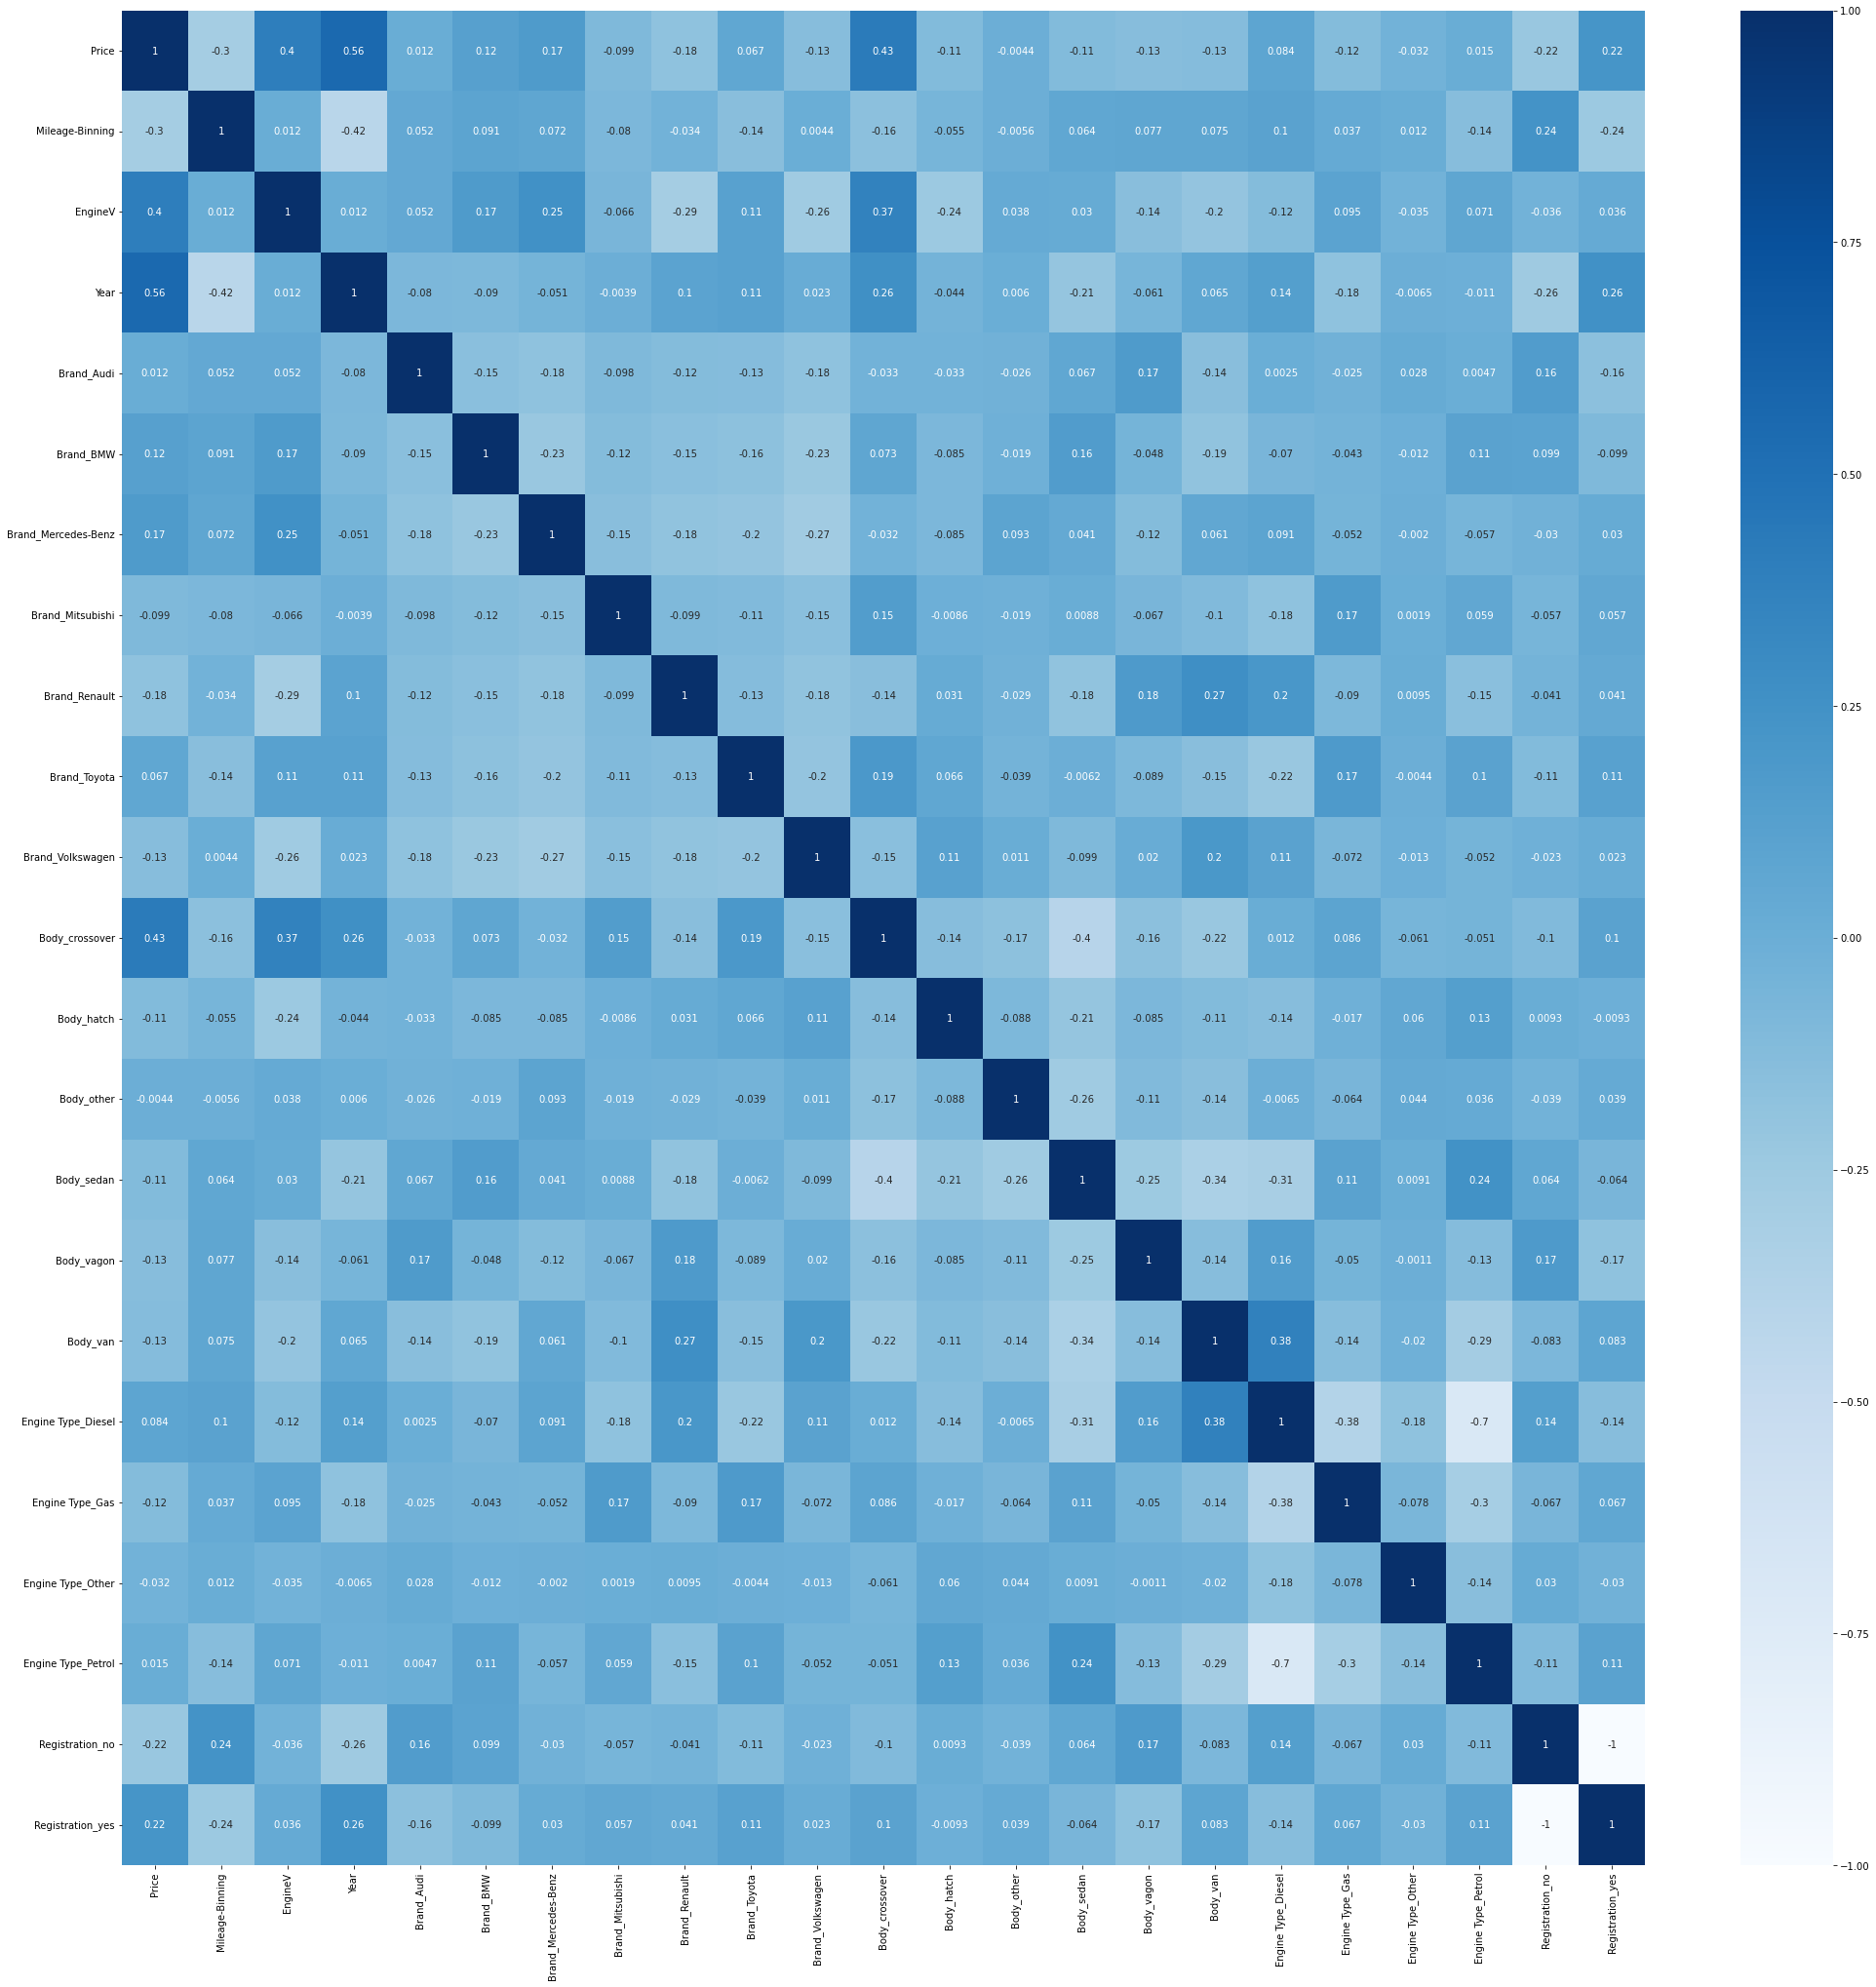

In [45]:

plt.figure(figsize = (35, 35))
sns.heatmap(data = df[["Price","Mileage-Binning", "EngineV", "Year","Brand_Audi","Brand_BMW","Brand_Mercedes-Benz","Brand_Mitsubishi","Brand_Renault","Brand_Toyota",  "Brand_Volkswagen","Body_crossover" ,"Body_hatch","Body_other","Body_sedan",  "Body_vagon",  "Body_van",  "Engine Type_Diesel" ,"Engine Type_Gas", "Engine Type_Other",  "Engine Type_Petrol" , "Registration_no","Registration_yes" ]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()


In [46]:
df[["Price","Mileage-Binning", "EngineV", "Year","Brand_Audi","Brand_BMW","Brand_Mercedes-Benz","Brand_Mitsubishi","Brand_Renault","Brand_Toyota",  "Brand_Volkswagen","Body_crossover" ,"Body_hatch","Body_other","Body_sedan",  "Body_vagon",  "Body_van",  "Engine Type_Diesel" ,"Engine Type_Gas", "Engine Type_Other",  "Engine Type_Petrol" , "Registration_no","Registration_yes" ]].corr()

,Price,Mileage-Binning,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
Price,1.000000,-0.295908,0.404333,0.556292,0.012056,0.119538,0.171318,-0.099297,-0.179411,0.067101,...,-0.004416,-0.114886,-0.134745,-0.131384,0.084031,-0.124158,-0.031501,0.014911,-0.224136,0.224136
Mileage-Binning,-0.295908,1.000000,0.012171,-0.420229,0.051914,0.091365,0.071877,-0.079965,-0.034415,-0.143258,...,-0.005586,0.064139,0.077074,0.075210,0.102771,0.037206,0.012074,-0.138278,0.241920,-0.241920
EngineV,0.404333,0.012171,1.000000,0.011903,0.051682,0.170575,0.254736,-0.066413,-0.292485,0.113393,...,0.037763,0.030385,-0.142937,-0.200387,-0.124546,0.095143,-0.035059,0.070618,-0.035992,0.035992
Year,0.556292,-0.420229,0.011903,1.000000,-0.080322,-0.090119,-0.050703,-0.003932,0.099562,0.114158,...,0.006001,-0.208039,-0.061273,0.065204,0.138276,-0.176435,-0.006471,-0.011054,-0.255651,0.255651
Brand_Audi,0.012056,0.051914,0.051682,-0.080322,1.000000,-0.149475,-0.177811,-0.097806,-0.119259,-0.129293,...,-0.026403,0.067343,0.170149,-0.144962,0.002474,-0.024728,0.027601,0.004734,0.161606,-0.161606
Brand_BMW,0.119538,0.091365,0.170575,-0.090119,-0.149475,1.000000,-0.226119,-0.124378,-0.151659,-0.164419,...,-0.019212,0.162621,-0.048151,-0.186979,-0.069885,-0.043151,-0.012223,0.108697,0.098940,-0.098940
Brand_Mercedes-Benz,0.171318,0.071877,0.254736,-0.050703,-0.177811,-0.226119,1.000000,-0.147956,-0.180409,-0.195588,...,0.092528,0.041155,-0.122846,0.060506,0.091496,-0.051663,-0.001958,-0.056891,-0.029992,0.029992
Brand_Mitsubishi,-0.099297,-0.079965,-0.066413,-0.003932,-0.097806,-0.124378,-0.147956,1.000000,-0.099235,-0.107584,...,-0.019185,0.008806,-0.067003,-0.103078,-0.176577,0.170084,0.001935,0.059424,-0.057321,0.057321
Brand_Renault,-0.179411,-0.034415,-0.292485,0.099562,-0.119259,-0.151659,-0.180409,-0.099235,1.000000,-0.131182,...,-0.029065,-0.181871,0.175614,0.266464,0.203834,-0.089843,0.009536,-0.150423,-0.041037,0.041037
Brand_Toyota,0.067101,-0.143258,0.113393,0.114158,-0.129293,-0.164419,-0.195588,-0.107584,-0.131182,1.000000,...,-0.039360,-0.006203,-0.089140,-0.146338,-0.219972,0.173565,-0.004429,0.104475,-0.110087,0.110087


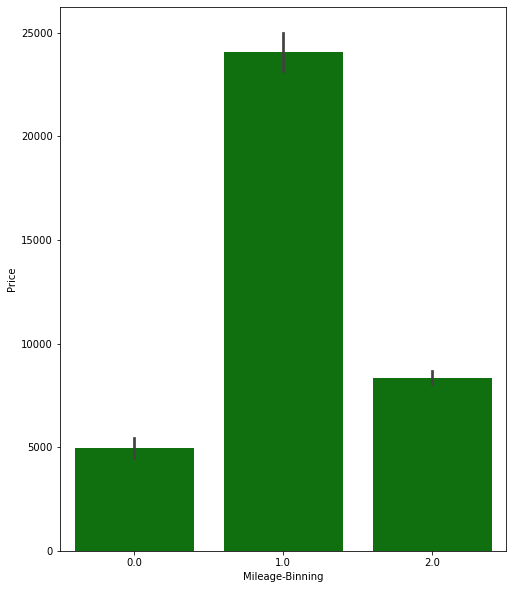

In [47]:
#Relacion Kilometraje & Precio
plt.figure(figsize = (8, 10))
sns.barplot(x = df["Mileage-Binning"], y = df["Price"], color = "green")
plt.show()

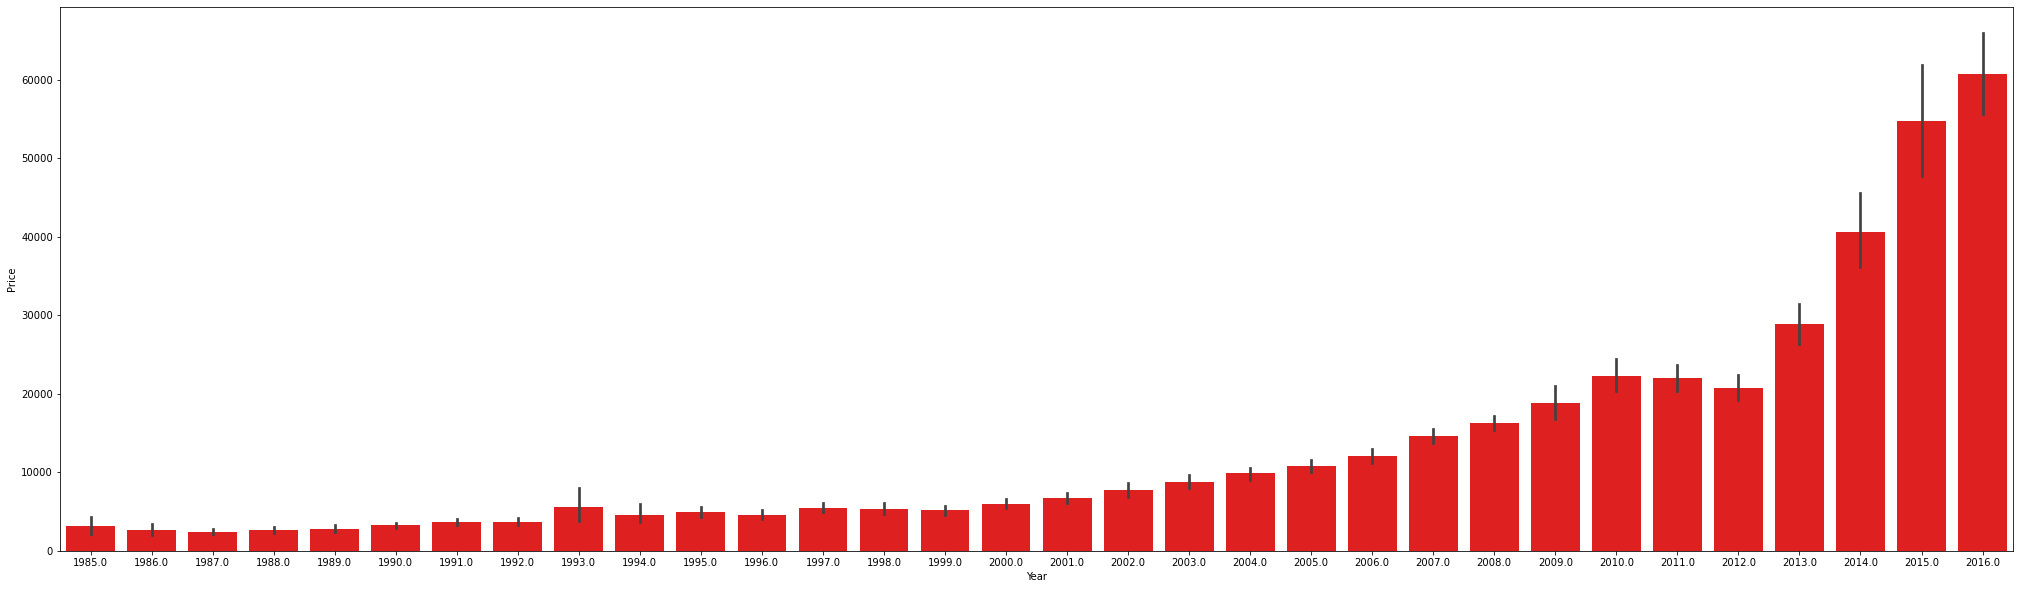

In [48]:
#Relacion Año & Precio
plt.figure(figsize = (35, 10))
sns.barplot(x = df["Year"], y = df["Price"], color = "red")
plt.show()

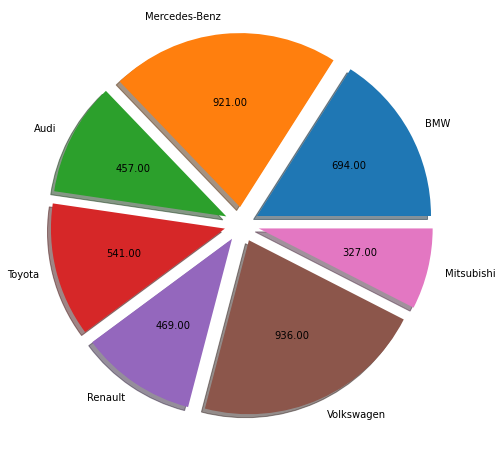

In [49]:
plt.figure(figsize = (12, 8))

values = np.array(df["Brand"].value_counts(sort = False).values)

plt.pie(values,
        labels = df["Brand"].value_counts(sort = False).index.to_list(),
        shadow = True,
        explode = [0.1 for i in range(7)],
        autopct = lambda x : '{:.2f}'.format(x*values.sum()/100)
       )  
plt.show()  

In [50]:
values

array([694, 921, 457, 541, 469, 936, 327], dtype=int64)

In [51]:
df["Brand"].value_counts(sort = False).index.to_list()

['BMW',
 'Mercedes-Benz',
 'Audi',
 'Toyota',
 'Renault',
 'Volkswagen',
 'Mitsubishi']

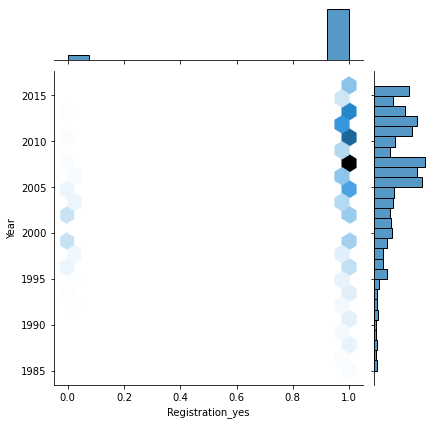

In [52]:

sns.jointplot(x = df["Registration_yes"], 
              y = df["Year"],
              kind = "hex",
              gridsize = 20)
plt.show()


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 0 to 4344
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                3954 non-null   float64
 1   Mileage              3954 non-null   float64
 2   EngineV              3954 non-null   float64
 3   Year                 3954 non-null   float64
 4   Mileage-Binning      3954 non-null   float64
 5   Brand                4345 non-null   object 
 6   Body                 4345 non-null   object 
 7   Engine Type          4345 non-null   object 
 8   Registration         4345 non-null   object 
 9   Model                4345 non-null   object 
 10  Brand_Audi           4345 non-null   uint8  
 11  Brand_BMW            4345 non-null   uint8  
 12  Brand_Mercedes-Benz  4345 non-null   uint8  
 13  Brand_Mitsubishi     4345 non-null   uint8  
 14  Brand_Renault        4345 non-null   uint8  
 15  Brand_Toyota         4345 non-null   u

In [54]:
df.isnull().sum()

Price                  391
Mileage                391
EngineV                391
Year                   391
Mileage-Binning        391
Brand                    0
Body                     0
Engine Type              0
Registration             0
Model                    0
Brand_Audi               0
Brand_BMW                0
Brand_Mercedes-Benz      0
Brand_Mitsubishi         0
Brand_Renault            0
Brand_Toyota             0
Brand_Volkswagen         0
Body_crossover           0
Body_hatch               0
Body_other               0
Body_sedan               0
Body_vagon               0
Body_van                 0
Engine Type_Diesel       0
Engine Type_Gas          0
Engine Type_Other        0
Engine Type_Petrol       0
Registration_no          0
Registration_yes         0
Model_encoder            0
dtype: int64

In [55]:
df.dropna(inplace=True)

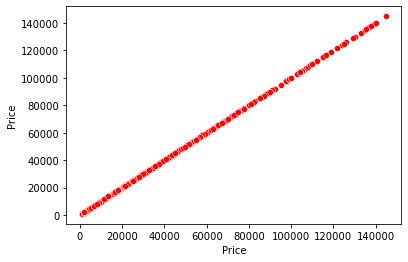

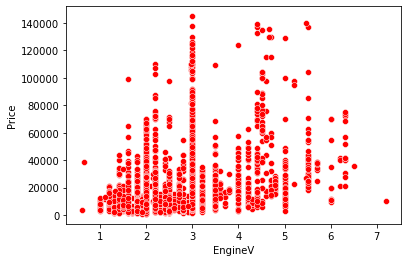

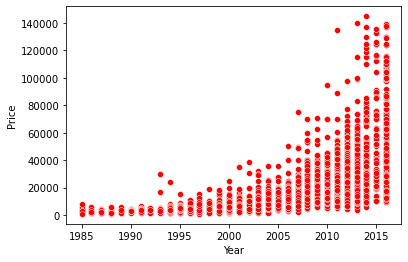

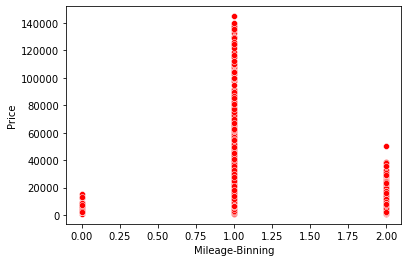

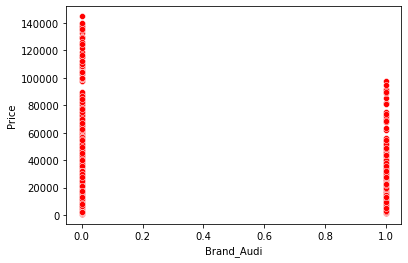

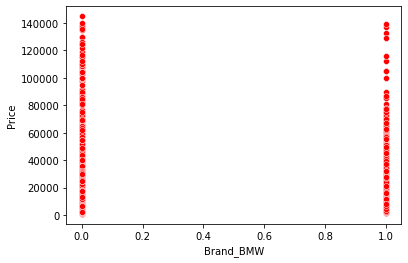

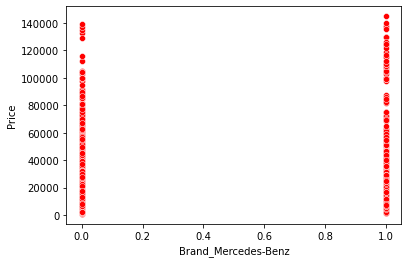

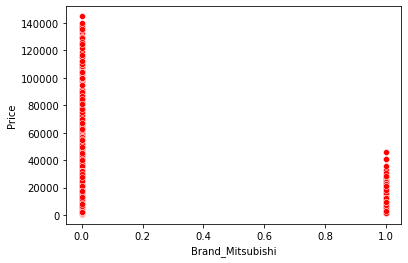

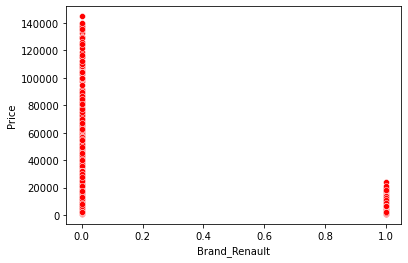

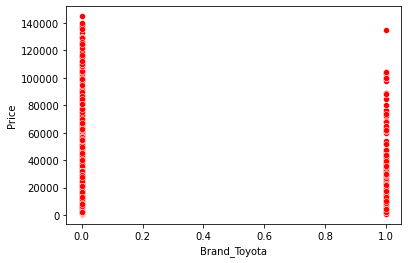

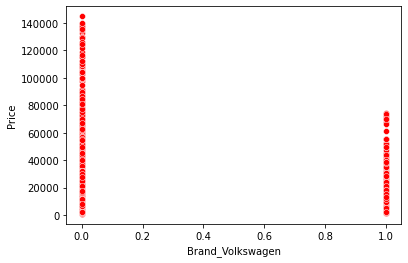

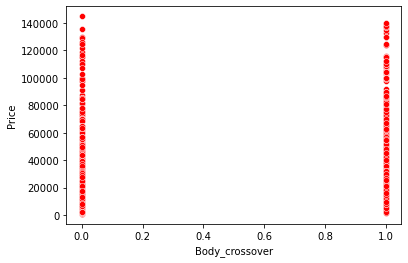

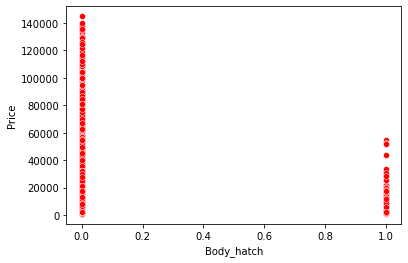

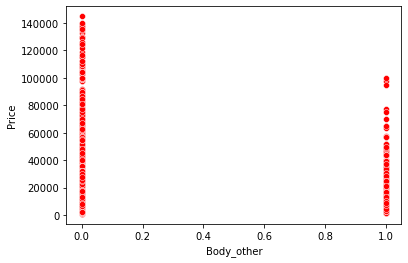

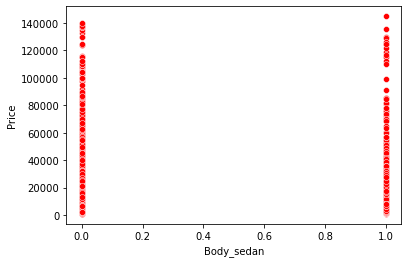

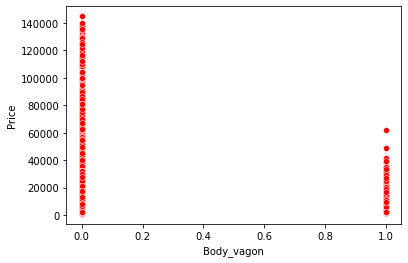

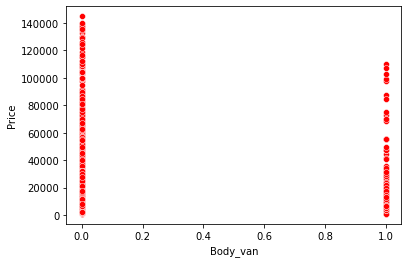

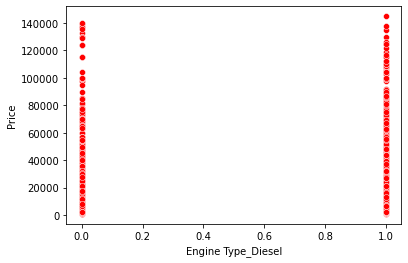

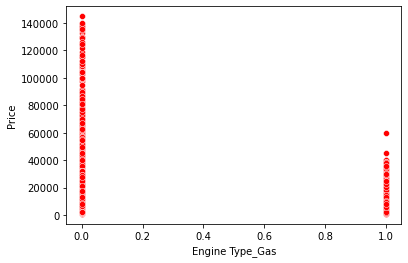

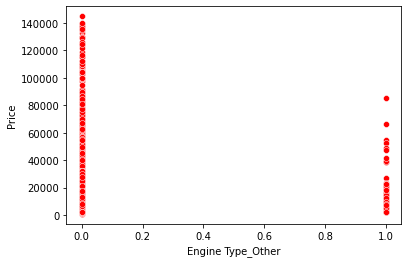

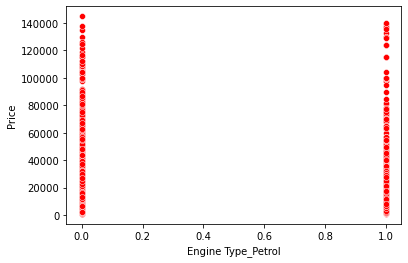

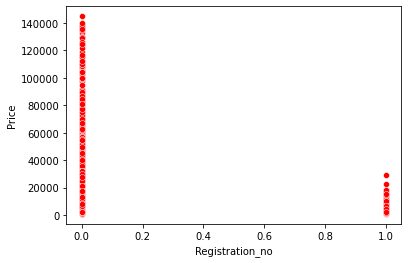

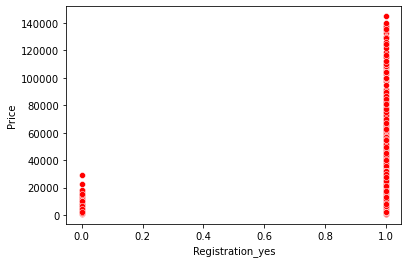

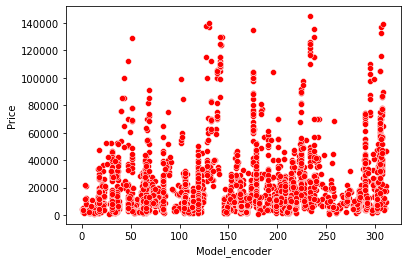

In [56]:
for col in df.drop(["Mileage","Brand","Body","Model","Engine Type","Registration"], axis = 1).columns:
    sns.scatterplot(x = df.drop(["Mileage","Brand","Body","Model","Engine Type","Registration"], axis = 1)[col], y = df.drop(["Mileage","Brand","Body","Model","Engine Type","Registration"], axis = 1)["Price"], color = "r")
    plt.show()

In [57]:
lkjhf

NameError: name 'lkjhf' is not defined

In [58]:
df

,Price,Mileage,EngineV,Year,Mileage-Binning,Brand,Body,Engine Type,Registration,Model,...,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes,Model_encoder
0,4200.0,277.0,2.0,1991.0,2.0,BMW,sedan,Petrol,yes,320,...,1,0,0,0,0,0,1,0,1,18
1,7900.0,427.0,2.9,1999.0,0.0,Mercedes-Benz,van,Diesel,yes,Sprinter 212,...,0,0,1,1,0,0,0,0,1,266
2,13300.0,358.0,5.0,2003.0,2.0,Mercedes-Benz,sedan,Gas,yes,S 500,...,1,0,0,0,1,0,0,0,1,237
3,23000.0,240.0,4.2,2007.0,2.0,Audi,crossover,Petrol,yes,Q7,...,0,0,0,0,0,0,1,0,1,224
4,18300.0,120.0,2.0,2011.0,1.0,Toyota,crossover,Petrol,yes,Rav 4,...,0,0,0,0,0,0,1,0,1,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35.0,1.6,2014.0,1.0,Toyota,sedan,Petrol,yes,Corolla,...,1,0,0,0,0,0,1,0,1,114
4340,125000.0,9.0,3.0,2014.0,1.0,Mercedes-Benz,sedan,Diesel,yes,S 350,...,1,0,0,1,0,0,0,0,1,233
4341,6500.0,1.0,3.5,1999.0,1.0,BMW,sedan,Petrol,yes,535,...,1,0,0,0,0,0,1,0,1,37
4342,8000.0,194.0,2.0,1985.0,2.0,BMW,sedan,Petrol,yes,520,...,1,0,0,0,0,0,1,0,1,31


# CLUSTERING

In [ ]:
# Ahora vamos a separar la columna "objetivo" (o la que quiero predecir) del resto de columnas
df_class = df["Price"].copy()

# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df.drop("Price", axis = 1, inplace = True)

In [ ]:
X = np.asarray(df.drop(["Mileage","Brand","Body","Model","Engine Type","Registration"], axis = 1))

y = np.asarray(df_class)

In [ ]:
X.shape,y.shape

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.drop(["Mileage","Brand","Body","Model","Engine Type","Registration"], axis = 1).columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Modelos de regresión

In [ ]:
df[["EngineV", "Year", "Mileage-Binning"]].head()

In [ ]:
X2 = np.array(df[["EngineV", "Year", "Mileage-Binning"]])
X2.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

In [ ]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)


In [ ]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
X3 = np.array(df[["EngineV", "Year", "Mileage-Binning","Brand_Audi","Brand_BMW","Brand_Mercedes-Benz","Brand_Mitsubishi","Brand_Renault","Brand_Toyota","Brand_Volkswagen"]])

X3.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
X4 = np.array(df[["EngineV", "Year", "Mileage-Binning","Body_crossover","Body_hatch","Body_other","Body_sedan","Body_vagon","Body_van"]])
X4.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
X5 = np.array(df[["EngineV", "Year", "Mileage-Binning","Engine Type_Diesel","Engine Type_Gas","Engine Type_Other","Engine Type_Petrol"]])
X5.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")


In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
X6 = np.array(df[["EngineV", "Year", "Mileage-Binning","Brand_Audi","Brand_BMW","Brand_Mercedes-Benz","Brand_Mitsubishi","Brand_Renault","Brand_Toyota","Brand_Volkswagen","Body_crossover","Body_hatch","Body_other","Body_sedan","Body_vagon","Body_van", "Engine Type_Diesel","Engine Type_Gas","Engine Type_Other","Engine Type_Petrol"]])

X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")


In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
X7 = np.array(df[["Mileage-Binning", "Year"]])

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")


In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}") #cuántos puntos de promedio hay de diferencia
print(f"MSE:\t {mean_squared_error(yhat, y_test)}") #hay puntos que se diferencian muchísimo
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")